## Purpose of this notebook

Summary up to this point:
We have extracted variables for patient demographics, services, procedures, lab tests and diagnosis. In this notebook we will perform exploratory data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import the compiled datagrame
combined_df = pd.read_csv('../../data/processed/processed_for_eda_022920.csv')

In [2]:
list_of_cols = combined_df.columns.tolist()
print(len(list_of_cols))
print(list_of_cols[0:10])

332
['Unnamed: 0', 'HADM_ID', 'OUTPUT_LABEL', '1Y_PRIOR_ADM', 'LENGTH_OF_STAY_DAYS', 'AGE', 'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT', 'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI', 'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM', 'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR']


In [3]:
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# first lets calculate the prevalence of readmissions
counts = combined_df.groupby('OUTPUT_LABEL')['HADM_ID'].count().values
prevalence = counts[1]/(counts[0]+counts[1])
print("The prevalence of 30-day readmissions is ", prevalence)
print("The absolute number of readmitted patients is ", counts[1])

The prevalence of 30-day readmissions is  0.06618512993640575
The absolute number of readmitted patients is  2529


### Let's look at numerical features first
1. Age
2. Length of hospital stay
3. Number of performed services
4. Number of performed procedures
5. Laboratory test results

In [5]:
import seaborn as sns

# Create an array with colors
colors = ["#6495ed", "#ff6347"]
# Set custom color palette
sns.set_palette(sns.color_palette(colors))

# create a column for more informative leend plotting
combined_df.loc[combined_df['OUTPUT_LABEL'] == 1, 'Readmission'] = 'Positive'
combined_df.loc[combined_df['OUTPUT_LABEL'] == 0, 'Readmission'] = 'Negative'

In [6]:
print("the minimum age is ", combined_df.AGE.min())
print("the maximum age is ", combined_df.AGE.max())

the minimum age is  15
the maximum age is  91


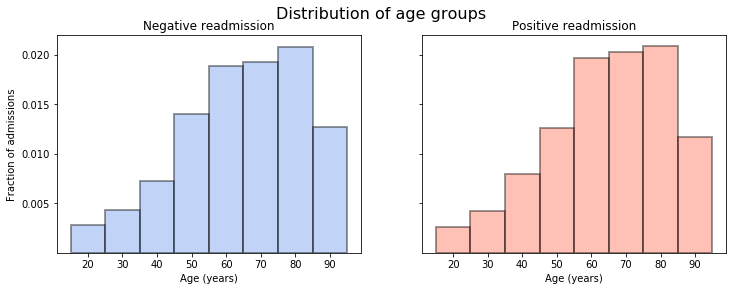

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.distplot(combined_df[combined_df.OUTPUT_LABEL==0]['AGE'], bins=(np.arange(20,110, 10) - 5), kde=False, norm_hist=True, \
             hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0], color='#6495ed')
ax[0].set_xlabel('Age (years)')
ax[0].set_ylabel('Fraction of admissions')
ax[0].set_title("Negative readmission")
ax[0].set_yticks([0.005, 0.010, 0.015, 0.020])

sns.distplot(combined_df[combined_df.OUTPUT_LABEL==1]['AGE'], bins=(np.arange(20,110, 10) - 5), kde=False, norm_hist=True, \
            hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1], color='#ff6347')
ax[1].set_xlabel('Age (years)')
#ax[1].set_ylabel('Fraction of admissions')
ax[1].set_title("Positive readmission")
#ax[1].set_yticks([0.005, 0.010, 0.015, 0.020])
plt.suptitle('Distribution of age groups', fontsize=16)#, y=0.999)

plt.savefig('../../reports/figures/age_distribution.png', format='png')
plt.show()

Text(0.5, 1, 'Age vs leangth of hospital stay')

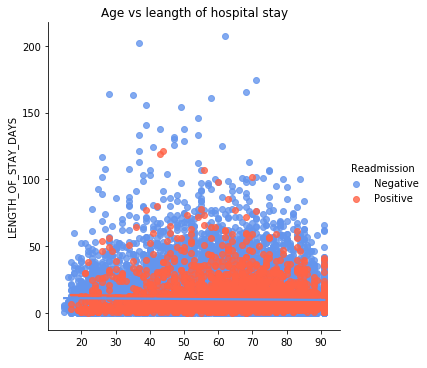

In [100]:
# There does not appear to be much of a difference in age groups
# plot age vs length of stay to gais more insight
sns.lmplot(x='AGE', y='LENGTH_OF_STAY_DAYS', hue='Readmission', data=combined_df)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Age vs leangth of hospital stay")

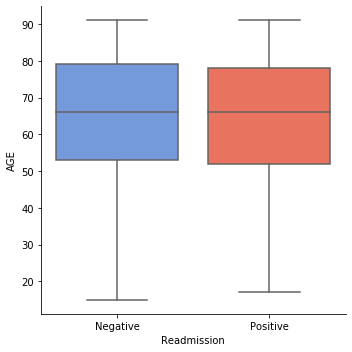

In [102]:
# there is no relationship between age and length of stay
sns.catplot(x="Readmission", y="AGE", kind='box', data=combined_df);

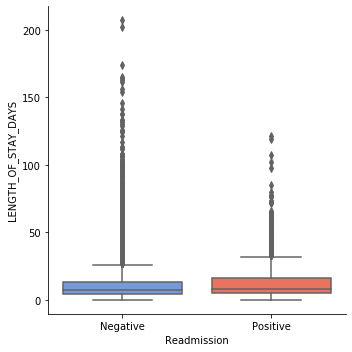

In [103]:
sns.catplot(x="Readmission", y="LENGTH_OF_STAY_DAYS", kind='box', data=combined_df);

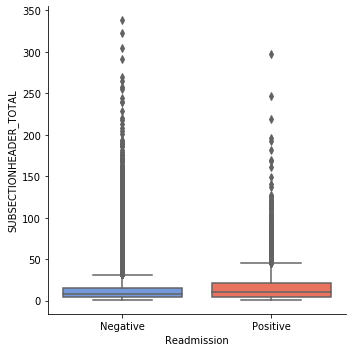

In [118]:
# length of stay is almost imperceptibly higher for positive readmissions, although negative readmissions have a lot
# more variation. This is expected since there are a lot more neagative readmissions than positive
sns.catplot(x="Readmission", y='SUBSECTIONHEADER_TOTAL', kind='box', data=combined_df);

There are slightly more procedures performed during positive readmsisions.

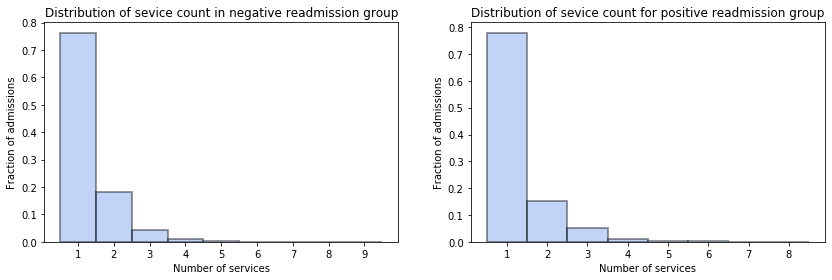

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.distplot(combined_df[combined_df.OUTPUT_LABEL==0]['CURR_SERVICE_TOTAL'], bins=(np.arange(1,11) - 0.5), kde=False, norm_hist=True, \
             hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0])
ax[0].set_xlabel('Number of services')
ax[0].set_ylabel('Fraction of admissions')
ax[0].set_title("Distribution of sevice count in negative readmission group")
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])

sns.distplot(combined_df[combined_df.OUTPUT_LABEL==1]['CURR_SERVICE_TOTAL'], bins=(np.arange(1,10) - 0.5), kde=False, norm_hist=True, \
            hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1])
ax[1].set_xlabel('Number of services')
ax[1].set_ylabel('Fraction of admissions')
ax[1].set_title("Distribution of sevice count for positive readmission group")

plt.suptitle('Summary statistics for laboratory test measurements')#, y=0.999)

plt.tight_layout()
plt.show()

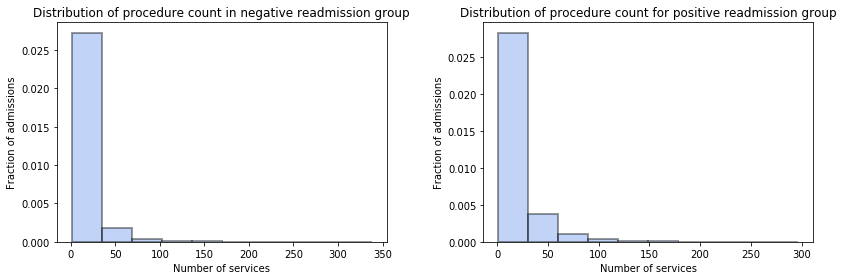

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.distplot(combined_df[combined_df.OUTPUT_LABEL==0]['SUBSECTIONHEADER_TOTAL'], bins=10, kde=False, norm_hist=True, \
             hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0])
ax[0].set_xlabel('Number of services')
ax[0].set_ylabel('Fraction of admissions')
ax[0].set_title("Distribution of procedure count in negative readmission group")
#ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])

sns.distplot(combined_df[combined_df.OUTPUT_LABEL==1]['SUBSECTIONHEADER_TOTAL'], bins=10, kde=False, norm_hist=True, \
            hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1])
ax[1].set_xlabel('Number of services')
ax[1].set_ylabel('Fraction of admissions')
plt.tight_layout()
plt.show()

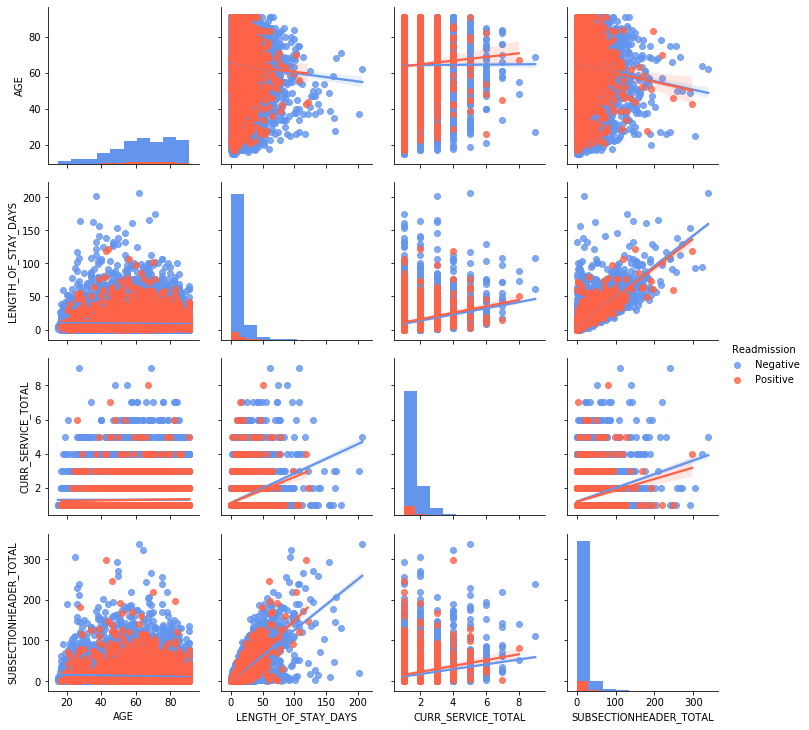

In [126]:
# let's look at pairwize relationships of the variables examined so far
sns.pairplot(combined_df, vars=['AGE', 'LENGTH_OF_STAY_DAYS', 'CURR_SERVICE_TOTAL', 'SUBSECTIONHEADER_TOTAL'], \
             hue='Readmission', kind='reg', diag_kind='hist') 

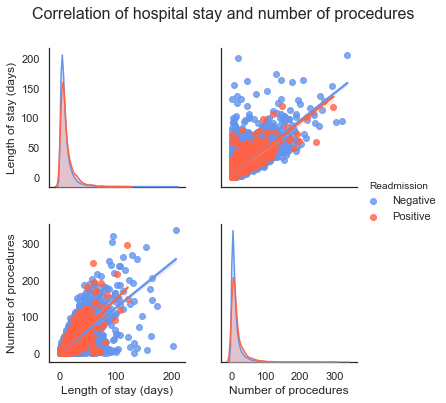

In [220]:
pp = sns.pairplot(combined_df, vars=['LENGTH_OF_STAY_DAYS', 'SUBSECTIONHEADER_TOTAL'], \
             hue='Readmission', kind='reg', diag_kind='kde') 
pp.axes[0,0].set_ylabel('Length of stay (days)')
pp.axes[1,0].set_ylabel('Number of procedures')

pp.axes[1,0].set_xlabel('Length of stay (days)')
pp.axes[1,1].set_xlabel('Number of procedures')

plt.suptitle('Correlation of hospital stay and number of procedures', fontsize=16, y=1.08)
plt.savefig('../../reports/figures/los_procedures.png', format='png')

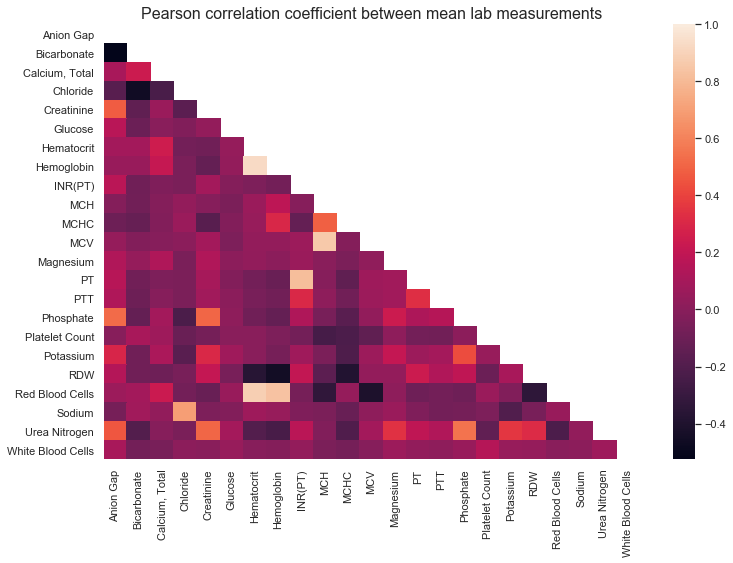

In [214]:
# it makes sense that length of stay and number of procedures is linearly correlated, the more days in the hospital
# the more procedures poerformed, although it is harder to see the same effect with services.
# let's get all the mean lab test results, the fastest way to visualize the pairwize relationships is to plot 
# Pearson correlation coefficient as a heatmap
mean_cols = [column for column in combined_df.columns.tolist() if column.startswith('Mean_')]
cols_for_plotting = [column.split('Mean_')[1] for column in mean_cols]

corr_mat = np.corrcoef(combined_df[mean_cols].values, rowvar=False)

mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_mat, annot=False, mask=mask, xticklabels=cols_for_plotting, yticklabels=cols_for_plotting)
ax.set_title("Pearson correlation coefficient between mean lab measurements", fontsize=16)
plt.savefig('../../reports/figures/pears_corr_coeff.png', format='png')

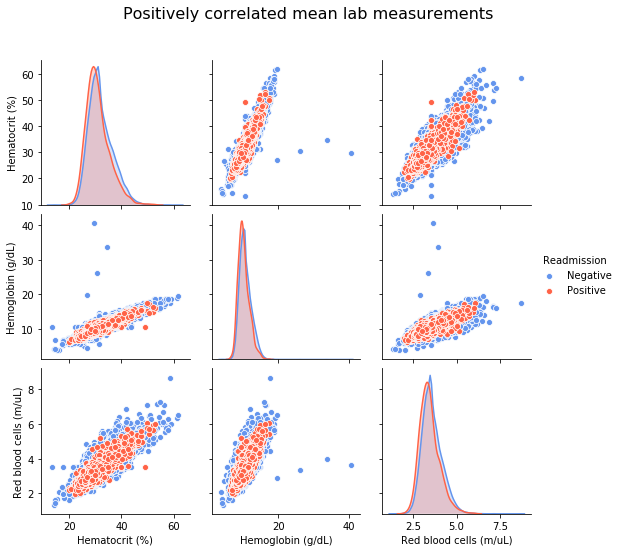

In [58]:
sns.set_palette(sns.color_palette(colors))
pp = sns.pairplot(combined_df, vars=['Mean_Hematocrit', 'Mean_Hemoglobin', 'Mean_Red Blood Cells'], \
             hue='Readmission', kind='scatter', diag_kind='kde') 
pp.axes[0,0].set_ylabel('Hematocrit (%)')
pp.axes[1,0].set_ylabel('Hemoglobin (g/dL)')
pp.axes[2,0].set_ylabel('Red blood cells (m/uL)')

pp.axes[2,0].set_xlabel('Hematocrit (%)')
pp.axes[2,1].set_xlabel('Hemoglobin (g/dL)')
pp.axes[2,2].set_xlabel('Red blood cells (m/uL)')

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)
plt.savefig('../../reports/figures/blood_correlation.png', format='png')

Text(0.5, 1, 'Pearson correlation coefficient between variances of lab measurements')

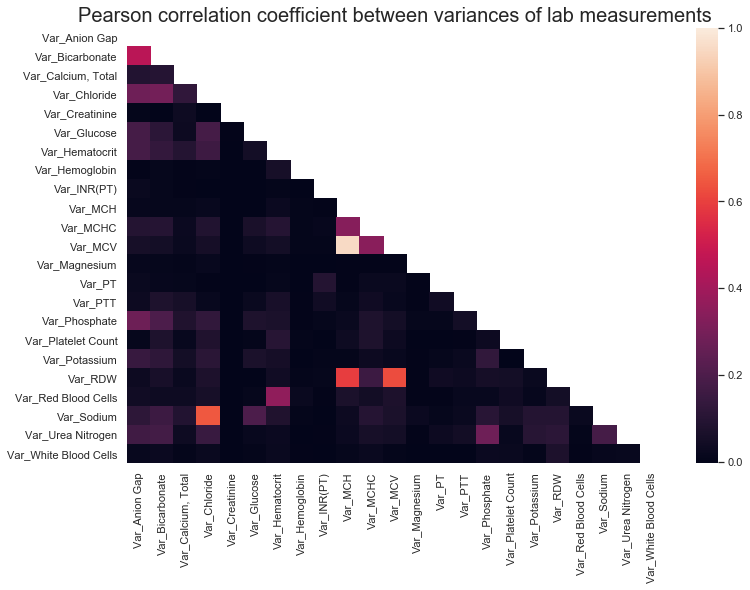

In [137]:
var_cols = [column for column in combined_df.columns.tolist() if column.startswith('Var_')]

corr_mat = np.corrcoef(combined_df[var_cols].values, rowvar=False)

mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_mat, annot=False, mask=mask, xticklabels=var_cols, yticklabels=var_cols)
ax.set_title("Pearson correlation coefficient between variances of lab measurements", fontsize=20)


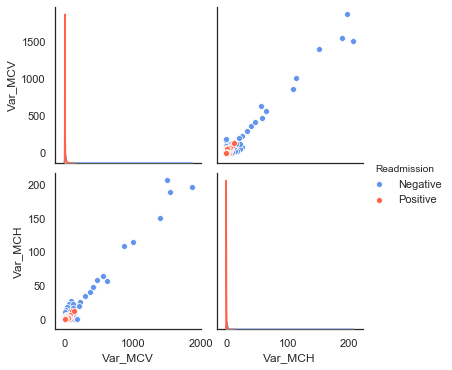

In [141]:
sns.pairplot(combined_df, vars=['Var_MCV', 'Var_MCH'], \
             hue='Readmission', kind='scatter', diag_kind='kde') 

Text(0.5, 1, 'Pearson correlation coefficient between variances of lab measurements')

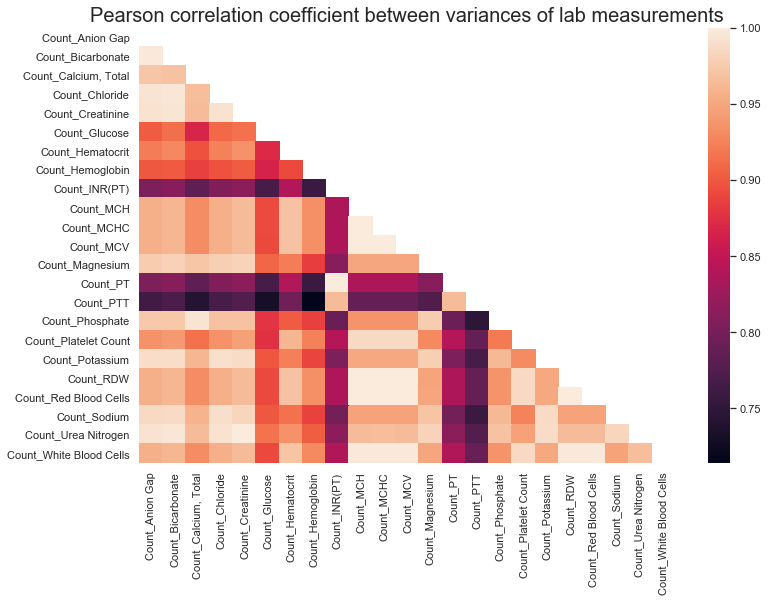

In [139]:
# MCV and MCH values are correlated, not much variance, there are a few outliers in the negative group
count_cols = [column for column in combined_df.columns.tolist() if column.startswith('Count_')]

corr_mat = np.corrcoef(combined_df[count_cols].values, rowvar=False)

mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_mat, annot=False, mask=mask, xticklabels=count_cols, yticklabels=count_cols)
ax.set_title("Pearson correlation coefficient between variances of lab measurements", fontsize=20)
#plt.savefig('../../reports/figures/pears_corr_coeff.png', format='png')

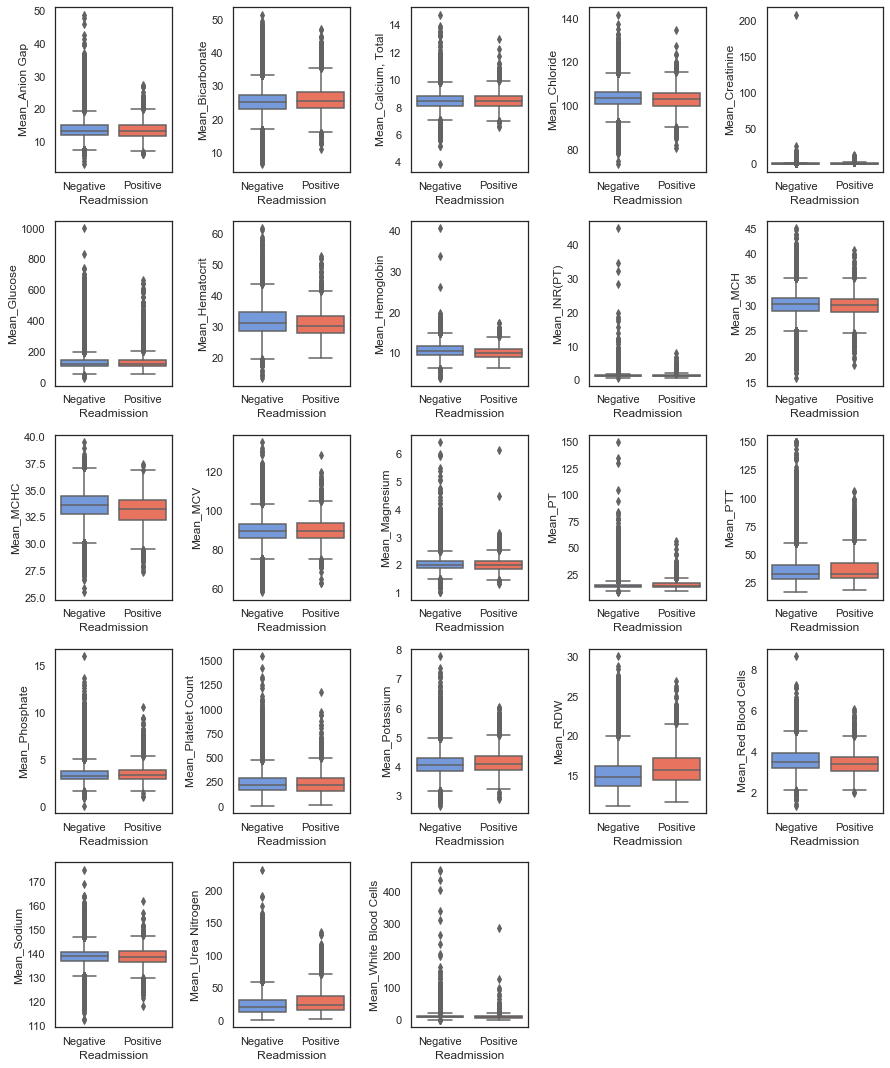

In [143]:
# Counts look a lot more correlated to one another, probably because multiple tests are conducted at the same time
# let's look at test variations among negative and positive admission groups
f = plt.figure(figsize=(15,15))
gs = f.add_gridspec(5, 6)

i=0
j=0
for column in mean_cols:
    ax = f.add_subplot(gs[i, j])
    ax = sns.boxplot(x="Readmission", y=column, data=combined_df)
    j+=1
    if j==5:
        i+=1
        j=0

plt.tight_layout()

In [49]:
from scipy.stats import ttest_ind

def ttest_print(column):
    y0 = combined_df[combined_df['OUTPUT_LABEL']==0][column]
    y1 = combined_df[combined_df['OUTPUT_LABEL']==1][column]
    print("t-test between label 0 and label 1 for {}".format(column))
    print(ttest_ind(y0, y1, equal_var=False))
    
test_cols = ['Mean_Hematocrit', 'Mean_Hemoglobin', 'Mean_MCHC', 'Mean_RDW', 'Mean_Red Blood Cells', \
             'Mean_Urea Nitrogen']

for column in test_cols:
    ttest_print(column)

t-test between label 0 and label 1 for Mean_Hematocrit
Ttest_indResult(statistic=11.73787494340868, pvalue=4.027305802080577e-31)
t-test between label 0 and label 1 for Mean_Hemoglobin
Ttest_indResult(statistic=15.584134244786286, pvalue=1.0972077343163897e-52)
t-test between label 0 and label 1 for Mean_MCHC
Ttest_indResult(statistic=14.581504284928416, pvalue=1.6320843473588515e-46)
t-test between label 0 and label 1 for Mean_RDW
Ttest_indResult(statistic=-18.388898807148674, pvalue=1.8131980178105844e-71)
t-test between label 0 and label 1 for Mean_Red Blood Cells
Ttest_indResult(statistic=12.826487283206374, pvalue=1.1271333764300437e-36)
t-test between label 0 and label 1 for Mean_Urea Nitrogen
Ttest_indResult(statistic=-9.951230916884148, pvalue=5.833290816902505e-23)


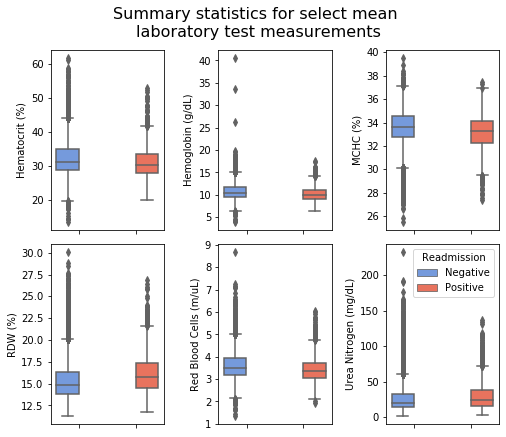

In [53]:
# plot a few graph showing differences amongst readmission groups for illustration purposes

# having trouble accessing the legend for categories, make a new column with desired legend
combined_df.loc[combined_df['OUTPUT_LABEL'] == 1, 'Readmission'] = 'Positive'
combined_df.loc[combined_df['OUTPUT_LABEL'] == 0, 'Readmission'] = 'Negative'

f = plt.figure(figsize=(7,6))
gs = f.add_gridspec(2, 3)
ax = f.add_subplot(gs[0, 0])
sns.boxplot(x='Readmission', y='Mean_Hematocrit', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Hematocrit (%)')
ax.get_legend().remove()

ax = f.add_subplot(gs[0, 1])
sns.boxplot(x='Readmission', y='Mean_Hemoglobin', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Hemoglobin (g/dL)')
ax.get_legend().remove()

ax = f.add_subplot(gs[0, 2])
sns.boxplot(x='Readmission', y='Mean_MCHC', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('MCHC (%)')
ax.get_legend().remove()

ax = f.add_subplot(gs[1, 0])
sns.boxplot(x='Readmission', y='Mean_RDW', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('RDW (%)')
ax.get_legend().remove()

ax = f.add_subplot(gs[1, 1])
sns.boxplot(x='Readmission', y='Mean_Red Blood Cells', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Red Blood Cells (m/uL)')
ax.get_legend().remove()

ax = f.add_subplot(gs[1, 2])
sns.boxplot(x='Readmission', y='Mean_Urea Nitrogen', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Urea Nitrogen (mg/dL)')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Summary statistics for select mean \nlaboratory test measurements',fontsize=16, y=0.999)

plt.savefig('../../reports/figures/select_lab_test_sum.png', format='png')

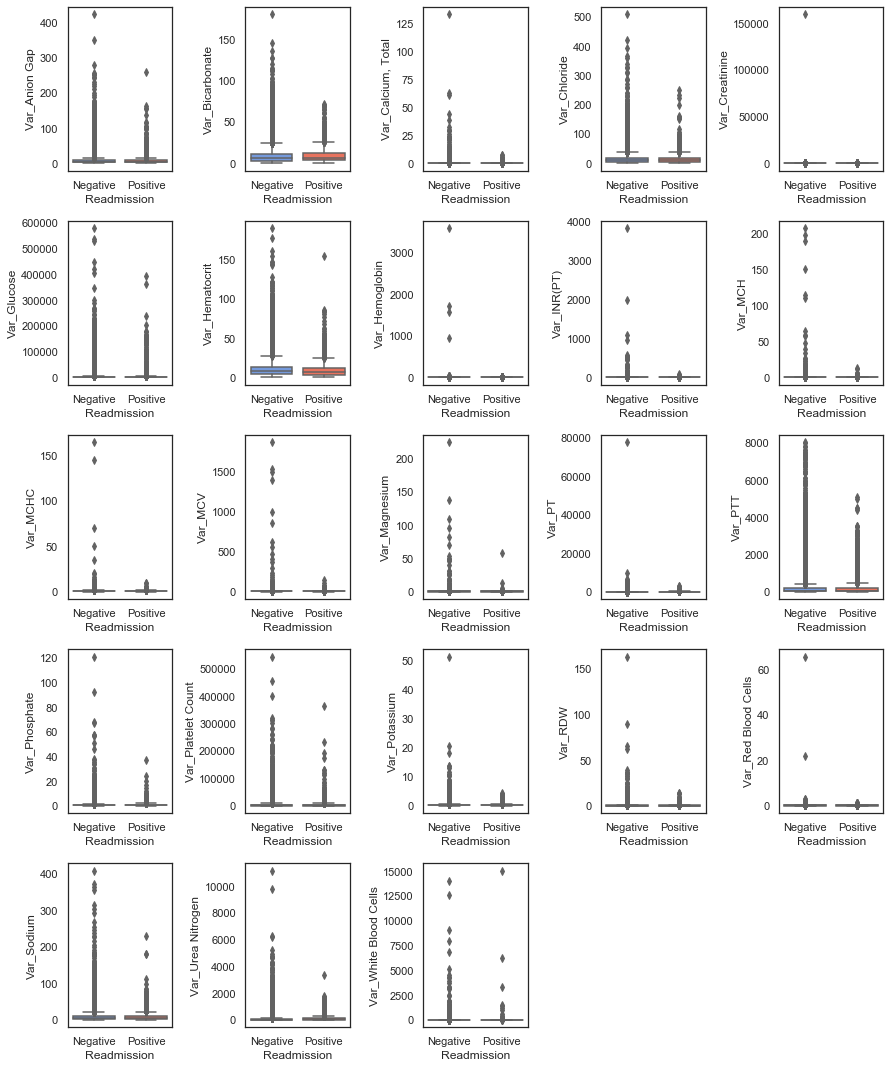

In [144]:
f = plt.figure(figsize=(15,15))
gs = f.add_gridspec(5, 6)

i=0
j=0
for column in var_cols:
    ax = f.add_subplot(gs[i, j])
    ax = sns.boxplot(x="Readmission", y=column, data=combined_df)
    j+=1
    if j==5:
        i+=1
        j=0

plt.tight_layout()

Most variance medians are around 0 and appear equal for positive or negative reamdission groups, hence the variance features are probably not very useful.

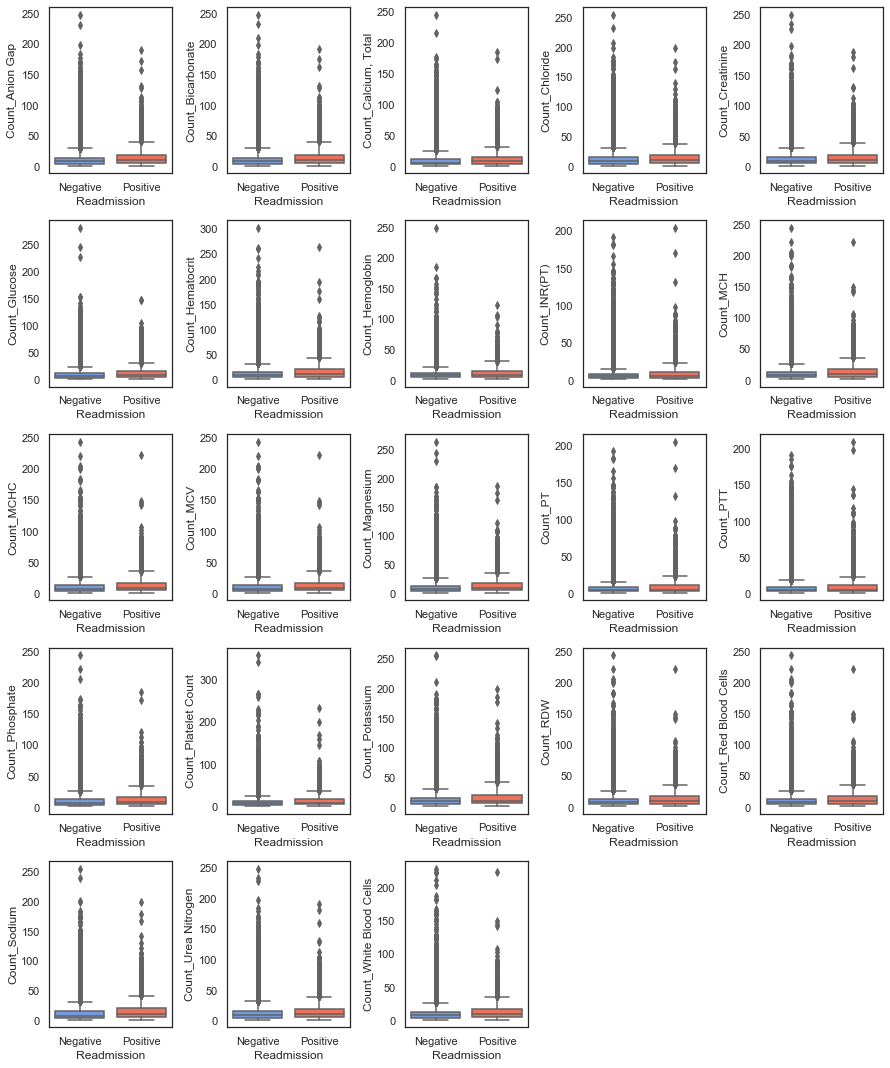

In [145]:
# for the most part variance is 0
f = plt.figure(figsize=(15,15))
gs = f.add_gridspec(5, 6)

i=0
j=0
for column in count_cols:
    ax = f.add_subplot(gs[i, j])
    ax = sns.boxplot(x="Readmission", y=column, data=combined_df)
    j+=1
    if j==5:
        i+=1
        j=0

plt.tight_layout()

All test counts are generally higher in positive readmission group. So there is no need to include all.

## Now let's look at categorical variables starting with admission location
1. admission location
2. discharge location
3. ethnicity
4. gender
5. services
6. procedures
7. diagnosis severity/mortality
8. diagnosis words

In [10]:
# columns in the same group have the same prefix, collect admission colations in a list
admit_cols = [column for column in combined_df.columns.tolist() if column.startswith('ADMISSION_')]
admit_cols

['ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
 'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
 'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
 'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR']

In [23]:
# summary dataframe for different admission location counts
admit_df = combined_df.groupby('Readmission')[admit_cols].sum()
admit_df.T

Readmission,Negative,Positive
ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,18132,1417
ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,1266,108
ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,7014,367
ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,188,25


Text(0, 3029, '# of positive readmissions')

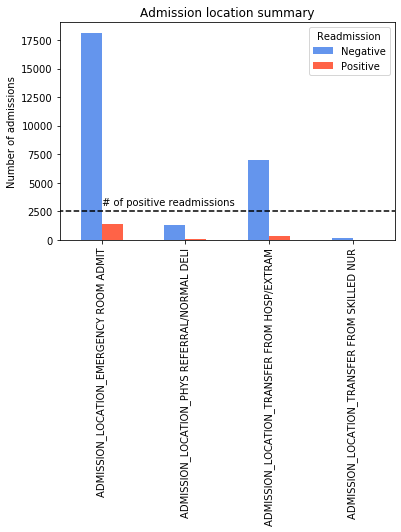

In [27]:
admit_df.T.plot.bar()
plt.hlines(counts[1], -1, 4, ls='--')
plt.ylabel("Number of admissions")
plt.title("Admission location summary")
plt.annotate('# of positive readmissions', (0,counts[1]+500))

In [39]:
# calculate the proportions of each type of admission with a negative and positive label
admit_df = admit_df.T
print(admit_df)
admit_df['Negative_prop'] = admit_df['Negative']/admit_df['Negative'].sum()
admit_df['Positive_prop'] = admit_df['Positive']/admit_df['Positive'].sum()
admit_df

Readmission                                   Negative  Positive
ADMISSION_LOCATION_EMERGENCY ROOM ADMIT          18132      1417
ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI      1266       108
ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM      7014       367
ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR       188        25


Readmission,Negative,Positive,Negative_prop,Positive_prop
ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,18132,1417,0.681654,0.739176
ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,1266,108,0.047594,0.056338
ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,7014,367,0.263684,0.191445
ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,188,25,0.007068,0.013041


Text(0, 0.11618512993640576, 'Fraction of total positive readmissions')

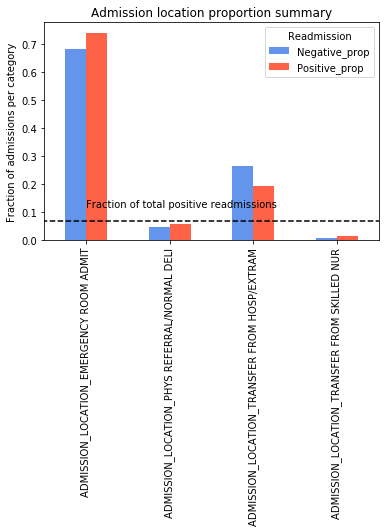

In [43]:
# plot proportions
admit_df[['Negative_prop', 'Positive_prop']].plot.bar()
plt.hlines(prevalence, -1, 4, ls='--')
plt.ylabel("Fraction of admissions per category")
plt.title("Admission location proportion summary")
plt.annotate('Fraction of total positive readmissions', (0,prevalence+0.05))

### Since the analysis above will be repeated for multiple categorical variables, write a fucntion for automatic grouping and plotting.

In [9]:
def plot_category_summary(prefix, figsize):
    """Plot the summary of all columns with the corresponding prefix"""
    column_group = [column for column in combined_df.columns.tolist() if column.startswith(prefix)]
    sum_df = combined_df.groupby('Readmission')[column_group].sum()
    # get rid of teh prefix in the column name
    new_col_names = [column.split(prefix)[1] for column in sum_df.columns.tolist()]
    # rename the columns
    sum_df.columns = new_col_names
    sum_df = sum_df.T
    
    sum_df['Negative proportion'] = sum_df['Negative']/sum_df['Negative'].sum()
    sum_df['Positive proportion'] = sum_df['Positive']/sum_df['Positive'].sum()

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    
    sum_df[['Negative', 'Positive']].plot.bar(ax=ax[0])
    ax[0].hlines(counts[1], -1, len(column_group), ls='--')
    ax[0].set_ylabel("Number of admissions per category")
    #ax[0].set_title(prefix+" category summary")
    ax[0].annotate('Total number of positive readmissions', (0,counts[1]+500))
    
    sum_df[['Negative proportion', 'Positive proportion']].plot.bar(ax=ax[1])
    ax[1].hlines(prevalence, -1, len(column_group), ls='--')
    ax[1].set_ylabel("Fraction of admissions per category")
    #ax[1].set_title(prefix+" category proportion summary")
    ax[1].annotate('Fraction of total positive readmissions', (0,prevalence+0.01))
    ax[1].get_legend().remove()
    
    plt.suptitle((prefix+" category summary"), fontsize=16, y=1.04)
    
    plt.tight_layout()

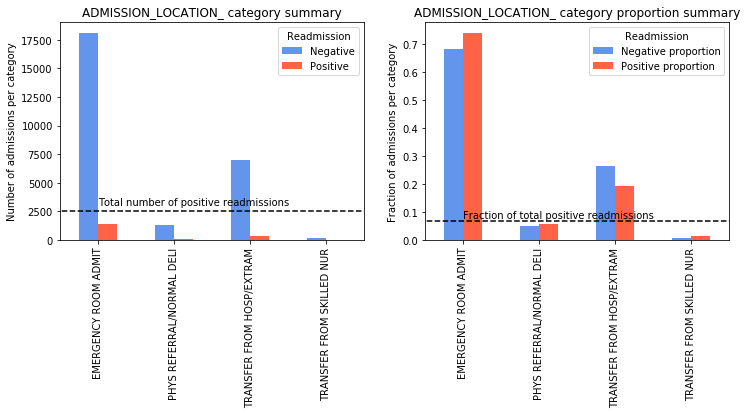

In [79]:
plot_category_summary('ADMISSION_LOCATION_')

The admission locations don't seam to matter (proportions are similar for positive and negative readmissions).

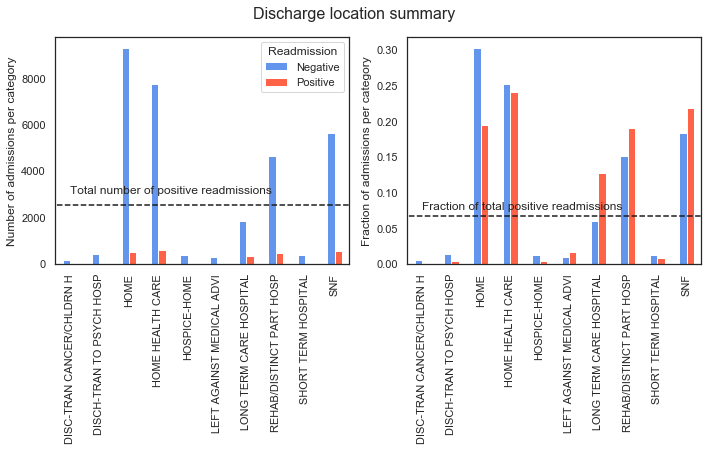

In [244]:
plot_category_summary('DISCHARGE_LOCATION_', (10,6))
plt.suptitle('Discharge location summary', fontsize=16, y=1.04)
plt.savefig('../../reports/figures/discharge_loc.png', format='png')

#### Long term care hospital is disproportionetly higher, which makes sense: patients with acute and/or chronic conditions are more lilely to be discharged to a long term care hospital and are also more likely to be readmitted.

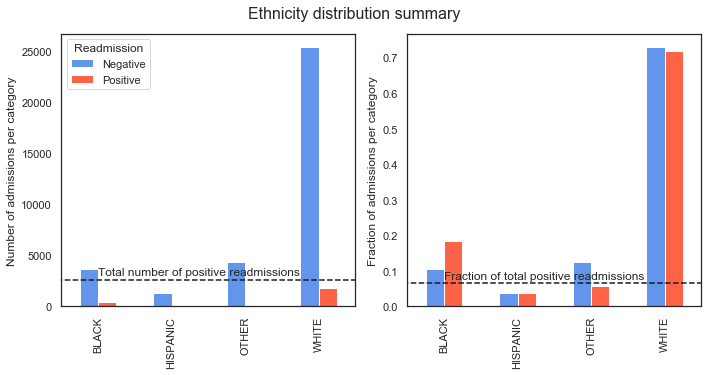

In [247]:
plot_category_summary('ETHNICITY_', (10,5))
plt.suptitle('Ethnicity distribution summary', fontsize=16, y=1.04)
plt.savefig('../../reports/figures/ethnicity.png', format='png')

#### Black pateints are disproportionately higher in the positive readmission group

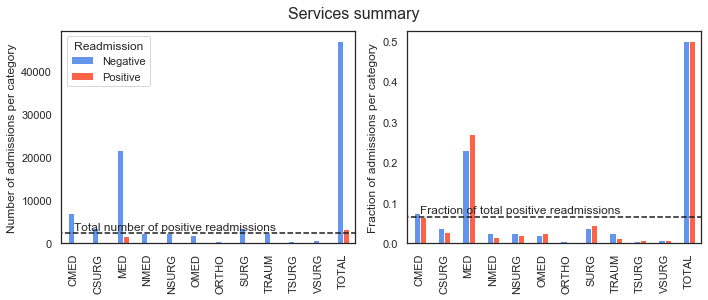

In [248]:
plot_category_summary('CURR_SERVICE_', (10,4))
plt.suptitle('Services summary', fontsize=16, y=1.04)
plt.savefig('../../reports/figures/services.png', format='png')

#### Medical and surgical services are slightly  higher in the positive readmission group, note the total services sums up all seevices per admission and is more apropriate to analyse as a numerical variable.

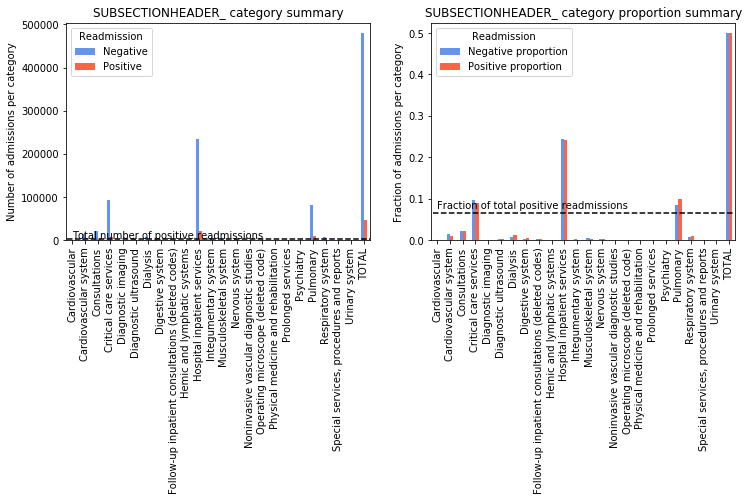

In [83]:
plot_category_summary('SUBSECTIONHEADER_')

#### The proportion of pulmonary and dialysis services appear slightly higher, but it is difficult to judge at this scale. Total number is again a numerical feature

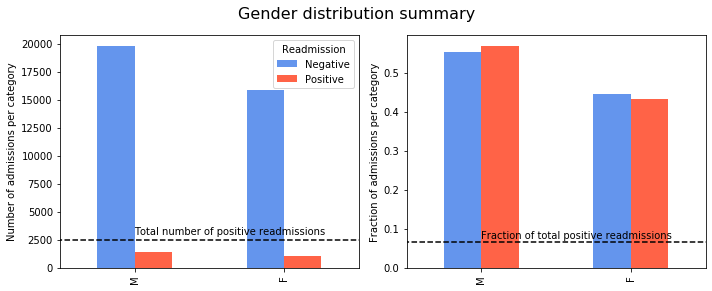

In [15]:
combined_df.loc[combined_df.GENDER_M==0, 'GENDER_F'] = 1
plot_category_summary('GENDER_', (10,4))
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Gender distribution summary', fontsize=16, y=0.999)
plt.savefig('../../reports/figures/gender.png', format='png')

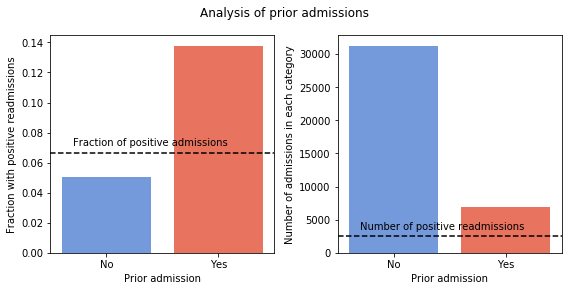

In [20]:
f = plt.figure(figsize=(8,4))
gs = f.add_gridspec(1, 2)

sum_df = pd.crosstab(combined_df['1Y_PRIOR_ADM'], combined_df.OUTPUT_LABEL)
sum_df['count'] = sum_df[0.0]+sum_df[1.0]
sum_df['pos_fraction'] = sum_df[1.0]/sum_df['count']
sum_df.reset_index(inplace=True)

ax1 = f.add_subplot(gs[0, 0])
ax1 = sns.barplot(x="1Y_PRIOR_ADM", y="pos_fraction", data=sum_df)
ax1.axhline(prevalence, ls='--', c='k')
ax1.annotate('Fraction of positive admissions', (-0.3,prevalence+0.005))
ax1.set_xticklabels(['No', 'Yes'])
ax1.set_xlabel('Prior admission')
ax1.set_ylabel('Fraction with positive readmissions')

ax2 = f.add_subplot(gs[0, 1])
ax1 = sns.barplot(x="1Y_PRIOR_ADM", y="count", data=sum_df)
ax2.axhline(counts[1], ls='--', c='k')
ax2.annotate('Number of positive readmissions', (-0.3,counts[1]+1000))
ax2.set_xticklabels(['No', 'Yes'])
ax2.set_xlabel('Prior admission')
ax2.set_ylabel('Number of admissions in each category')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Analysis of prior admissions', y=0.999)
plt.savefig('../../reports/figures/1year_readm.png', format='png')

In [26]:
total_e = combined_df.groupby('1Y_PRIOR_ADM')['HADM_ID'].count()
print(total_e)
total_ef = total_e/total_e.sum()
print(total_ef)

e0 = combined_df[combined_df['OUTPUT_LABEL']==0].groupby('1Y_PRIOR_ADM')['HADM_ID'].count()
e1 = combined_df[combined_df['OUTPUT_LABEL']==1].groupby('1Y_PRIOR_ADM')['HADM_ID'].count()

print("The number of patients with label 0 ", sum(e0))
print("The number of patients with label 1 ", sum(e1))

e0_expected = total_ef*e0.sum()
print("Observed frequencies of 1 year prior admissions in group 0")
print(e0)
print("Expected frequencies of 1 year prior admissions in group 0")
print(e0_expected)

e1_expected = total_ef*e1.sum()
print("Observed frequencies of 1 year prior admissions in group 1")
print(e1)
print("Expected frequencies of 1 year prior admissions in group 1")
print(e1_expected)

1Y_PRIOR_ADM
0.0    31264
1.0     6947
Name: HADM_ID, dtype: int64
1Y_PRIOR_ADM
0.0    0.818194
1.0    0.181806
Name: HADM_ID, dtype: float64
The number of patients with label 0  35682
The number of patients with label 1  2529
Observed frequencies of 1 year prior admissions in group 0
1Y_PRIOR_ADM
0.0    29692
1.0     5990
Name: HADM_ID, dtype: int64
Expected frequencies of 1 year prior admissions in group 0
1Y_PRIOR_ADM
0.0    29194.788098
1.0     6487.211902
Name: HADM_ID, dtype: float64
Observed frequencies of 1 year prior admissions in group 1
1Y_PRIOR_ADM
0.0    1572
1.0     957
Name: HADM_ID, dtype: int64
Expected frequencies of 1 year prior admissions in group 1
1Y_PRIOR_ADM
0.0    2069.211902
1.0     459.788098
Name: HADM_ID, dtype: float64


In [27]:
from scipy.stats import chisquare
chisq0, p0 = chisquare(e0, e0_expected)
chisq1, p1 = chisquare(e1, e1_expected)
print("Chi square statistic for group 0 is ", chisq0, ", with a p value ", p0)
print("Chi square statistic for group 1 is ", chisq1, ", with a p value ", p1)

Chi square statistic for group 0 is  46.576710158224245 , with a p value  8.810114895479513e-12
Chi square statistic for group 1 is  657.1570470010881 , with a p value  6.203081330811864e-145


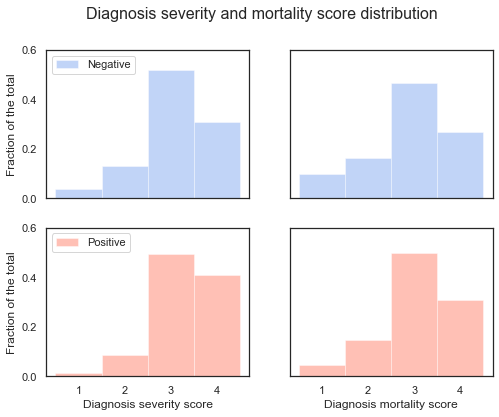

In [253]:
f = plt.figure(figsize=(8,6))
gs = f.add_gridspec(2, 2)
ax1 = f.add_subplot(gs[0, 0])
ax1 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==0]['DRG_SEVERITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, norm_hist=True, label='Not readmitted', color='cornflowerblue')
ax1.set_ylabel('Fraction of the total')
ax1.set_ylim(0,0.6)
ax1.set_yticks([0, 0.2, 0.4, 0.6])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.xaxis.get_label(), visible=False)
plt.legend(labels=['Negative'], loc='upper left')
ax2 = f.add_subplot(gs[0, 1], sharey=ax1)
ax2 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==0]['DRG_MORTALITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, norm_hist=True, color='cornflowerblue')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.xaxis.get_label(), visible=False)
ax2.set_ylim(0,0.6)

ax3 = f.add_subplot(gs[1, 0], sharex=ax1)
ax3 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==1]['DRG_SEVERITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, color='tomato', norm_hist=True, axlabel='Diagnosis severity score', label='Readmitted')
ax3.set_ylabel('Fraction of the total')
ax3.set_xticks([1, 2, 3, 4])
ax3.set_ylim(0,0.6)
ax3.set_yticks([0, 0.2, 0.4, 0.6])
plt.legend(labels=['Positive'], loc='upper left')

ax4 = f.add_subplot(gs[1, 1], sharey=ax3, sharex=ax2)
ax4 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==1]['DRG_MORTALITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, color='tomato', axlabel='Diagnosis mortality score', norm_hist=True)
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.set_xticks([1, 2, 3, 4])
ax4.set_ylim(0,0.6)

plt.suptitle('Diagnosis severity and mortality score distribution', fontsize=16)
plt.savefig('../../reports/figures/diag_sev_mort_score.png', format='png')

In [177]:
combined_df.columns.tolist()[-10:]

['unrel',
 'unspecifi',
 'urinari',
 'valv',
 'vascular',
 'ventil',
 'without',
 'wo',
 'Readmission',
 'GENDER_F']

In [60]:
combined_df.columns.tolist().index('DRG_MORTALITY')

130

In [61]:
diag_words = combined_df.columns.tolist()[131:-2]

In [62]:
len(diag_words)

200

In [59]:
# Import the script containing the functions for calculating Cramer's V, correlation ratio, conditional entropy and 
# Theil's U
import os
import sys
sys.path.insert(0, os.path.abspath('../../src/'))
import entropy_funcs

In [188]:
import time
start_time=time.monotonic()
# make a matrix with Cramer's V coefficient for all diagnosis word associations
# this may take a while because of the double loop
x = combined_df[diag_words[:26]]
corr_mat_cat = np.zeros((len(x.columns), len(x.columns)))
for i in range(len(x.columns)):
    for j in range(len(x.columns)):
        corr_mat_cat[i,j] = entropy_funcs.cramers_v(x.iloc[:,i], x.iloc[:,j])
print(time.monotonic() - start_time)

18.05189166099808


Text(0.5, 1, "Cramer's V coefficient between the diagnosis word columns")

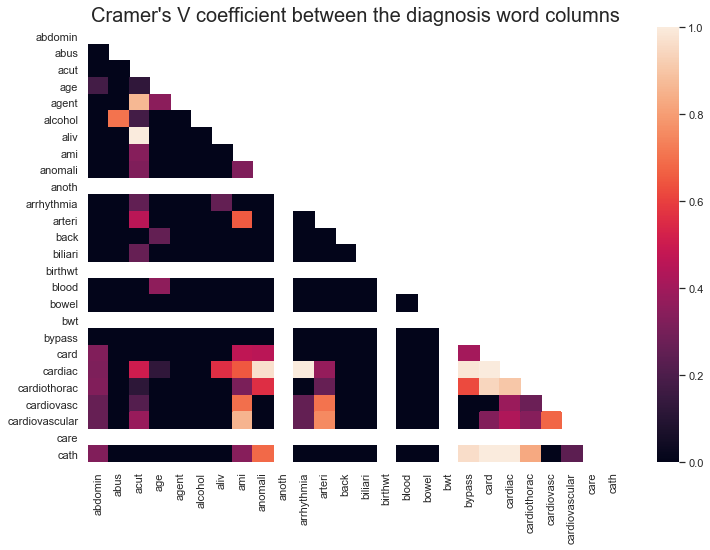

In [189]:
# Since the correlation matrix is symmetrical we will only plot half
mask = np.triu(np.ones_like(corr_mat_cat, dtype=np.bool))
#sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_mat_cat, annot=False, mask=mask, fmt = '.2f', xticklabels=x.columns, yticklabels=x.columns)
ax.set_title("Cramer's V coefficient between the diagnosis word columns", fontsize=20)
#plt.savefig('../../reports/figures/cat_correl.png', format='png')

In [192]:
combined_df['anoth'].sum()

0.0

In [63]:
# it looks like there are some columns with all zeros
sum_of_columns = combined_df[diag_words].sum()
cols_to_drop = sum_of_columns[sum_of_columns==0]
cols_to_drop

anoth       0.0
birthwt     0.0
bwt         0.0
care        0.0
die         0.0
dist        0.0
distress    0.0
facil       0.0
immatur     0.0
newborn     0.0
normal      0.0
prematur    0.0
syndoth     0.0
syndrom     0.0
transfer    0.0
dtype: float64

In [64]:
cols_to_drop = cols_to_drop.index.tolist()

In [65]:
combined_df.drop(columns=cols_to_drop, axis=1, inplace=True)
diag_words = combined_df.columns.tolist()[131:-2]

In [67]:
import time
start_time=time.monotonic()
# make a matrix with Cramer's V coefficient for all diagnosis word associations
# this may take a while because of the double loop
x = combined_df[diag_words[:51]]
corr_mat_cat = np.zeros((len(x.columns), len(x.columns)))
for i in range(len(x.columns)):
    for j in range(len(x.columns)):
        corr_mat_cat[i,j] = entropy_funcs.cramers_v(x.iloc[:,i], x.iloc[:,j])
print(time.monotonic() - start_time)

108.43227678599942


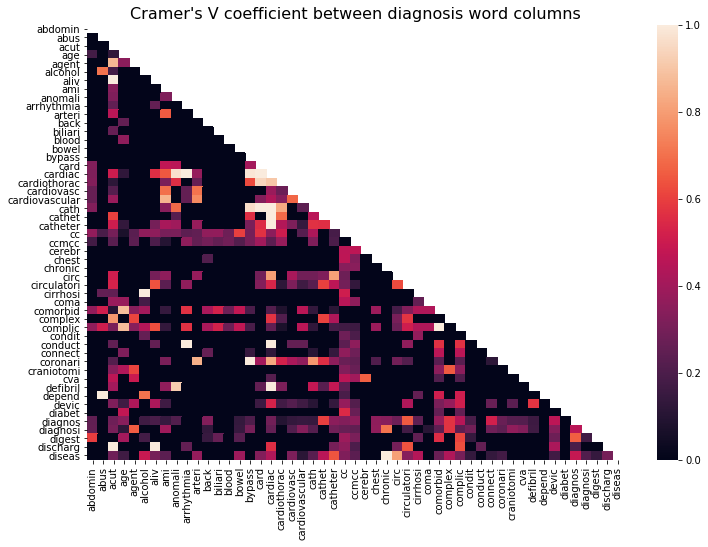

In [69]:
# Since the correlation matrix is symmetrical we will only plot half
mask = np.triu(np.ones_like(corr_mat_cat, dtype=np.bool))
#sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_mat_cat, annot=False, mask=mask, fmt = '.2f', xticklabels=x.columns, yticklabels=x.columns)
ax.set_title("Cramer's V coefficient between diagnosis word columns", fontsize=16)
plt.savefig('../../reports/figures/cat_correl.png', format='png')

In [72]:
from itertools import compress

# Define a function for generating the array and dictionary with correlated columns
def corr_extractor(corr_mat, cols_list, thresh):
    """With correlation matrix, list of columns (for which the 
    correlation matrix was calculated), and threshold (f0r 
    cooefficient comparison) as input return an array of 
    redundant column (to drop) and a dictionary to inspect 
    the correlations."""
    corr_mat_asym = np.tril(corr_mat, -1) # set the top half triangle of the matrix (including main diagonal) to 0
    bool_mask = abs(corr_mat_asym)>=thresh # create a boolean mask for values above the threshold

    corr_array = [] # initiate empty array and dictionary
    corr_dict = {}
    
    for i in range(len(cols_list)): 
        # iterate through the columns in cols_array and extract the associated column names with the boolean mask
        cors = list(compress(cols_list, bool_mask[:,i]))
        if cors!= []:
            corr_dict[cols_list[i]]=[]
            # create a key value pair, key= (query) column name values = list of associated columns
            corr_dict[cols_list[i]]+=cors
            for elem in cors:
                corr_array.append(elem) # create a list only with the redundant column (excluding the query)
    
    corr_array = list(dict.fromkeys(corr_array)) # drop duplicates
    
    return corr_array, corr_dict

In [76]:
diag_corr_array, diag_corr_dict = corr_extractor(corr_mat_cat, diag_words[:51], 0.75)

In [77]:
diag_corr_dict

{'abus': ['depend'],
 'acut': ['agent', 'aliv', 'complex', 'discharg'],
 'age': ['comorbid', 'complic'],
 'alcohol': ['cirrhosi'],
 'aliv': ['discharg'],
 'ami': ['cardiovascular'],
 'anomali': ['cardiac', 'defibril'],
 'arrhythmia': ['cardiac', 'conduct'],
 'arteri': ['cardiovascular', 'coronari'],
 'bypass': ['cardiac', 'cath', 'coronari'],
 'card': ['cardiac', 'cardiothorac', 'cath'],
 'cardiac': ['cardiothorac',
  'cath',
  'cathet',
  'catheter',
  'circ',
  'conduct',
  'coronari',
  'defibril'],
 'cardiothorac': ['cath'],
 'cath': ['coronari'],
 'catheter': ['circ'],
 'chronic': ['diseas'],
 'circ': ['diseas'],
 'comorbid': ['complic']}

In [255]:
combined_df.groupby('Readmission')['ccmcc'].sum()

Readmission
Negative    391.946194
Positive     15.302416
Name: ccmcc, dtype: float64

In [269]:
# drop extra columns and save the remaining dataset
combined_df.drop(columns=['Readmission', 'GENDER_F', 'HADM_ID'], axis=1, inplace=True)
combined_df.values.shape

(38211, 315)

In [625]:
combined_df.to_csv('../../data/processed/processed4_feat_select_fitting.csv')